# Table of Contents
### Import Libraries 
### Step 5: Create profiling variable based on age, income, goods, dependents
### Step 6: Create visualization to show distribution of profiles
### Export Dataframe


In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# turning folder path into string
path = r'/Users/davesmac/Desktop/04-2022- Instacart Basket Analysis'

In [4]:
# Import orders_products_all df
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl,'))

In [5]:
# Import departments_wrangled
dep_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_order,spender_flag,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,marital_status,income,_merge,Region,age_group,income_level,family_status_loc,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regular busy,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages


### Step 5: Create profiling variable based on age, income, goods, dependents

#### Create age group flag and column

In [8]:
# Create age group flag 
age_group = []

for value in ords_prods_all['Age']:
    if value < 18: 
        age_group.append('youth')
    elif value >= 18 and value <40: 
        age_group.append('young adult')
    elif value >= 40 and value < 65:
        age_group.append('middle age')
    elif value >= 65:
        age_group.append('senior')

In [9]:
# Create age_group column
ords_prods_all['age_group'] = age_group

In [10]:
ords_prods_all['age_group'].value_counts(dropna = False)

middle age     12663533
young adult    11162448
senior          8573751
Name: age_group, dtype: int64

#### Create income level flag and column

In [11]:
ords_prods_all['income'].describe()

count    3.239973e+07
mean     9.941685e+04
std      4.300669e+04
min      2.590300e+04
25%      6.699600e+04
50%      9.660800e+04
75%      1.278840e+05
max      5.939010e+05
Name: income, dtype: float64

In [12]:
# Create income flag
income_level = []

for value in ords_prods_all['income']: 
    if value <= 56410:
        income_level.append('low income')
    elif value > 56410 and value <= 142422:
        income_level.append('middle income')
    elif value > 142422:
        income_level.append('high income')

In [13]:
# Create income_level column
ords_prods_all['income_level'] = income_level

In [14]:
ords_prods_all['income_level'].value_counts(dropna = False)

middle income    21801120
high income       5460728
low income        5137884
Name: income_level, dtype: int64

In [15]:
crosstab_2 = pd.crosstab(ords_prods_all['marital_status'], ords_prods_all['n_dependants'], dropna = False)

In [16]:
crosstab_2

n_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771355,0,0,0
living with parents and siblings,0,530131,507900,512371
married,0,7549750,7581849,7621456
single,5324920,0,0,0


#### Create family status column and parent/not parent flag

In [17]:
# Create not a parent flag
ords_prods_all.loc[ords_prods_all['n_dependants'] == 0, 'family_status_loc'] = 'not a parent'

In [18]:
# Create parent flag
ords_prods_all.loc[ords_prods_all['n_dependants'] > 0, 'family_status_loc'] = 'parent'

In [19]:
ords_prods_all['family_status_loc'].value_counts(dropna = False)

parent          24303457
not a parent     8096275
Name: family_status_loc, dtype: int64

In [20]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_order,spender_flag,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,marital_status,income,_merge,Region,age_group,income_level,family_status_loc,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regular busy,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages


#### Assign department names to department_id, create department column

In [21]:
# Check department_id names
dep_df.head(30)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
# Assign department names to IDs
department = []

for value in ords_prods_all['department_id']: 
    if value == 1: 
        department.append('frozen')
    if value == 2: 
        department.append('other')
    if value == 3: 
        department.append('bakery')
    if value == 4: 
        department.append('produce')
    if value == 5: 
        department.append('alcohol')
    if value == 6: 
        department.append('international')
    if value == 7: 
        department.append('beverages')
    if value == 8: 
        department.append('pets')
    if value == 9: 
        department.append('dry goods pasta')
    if value == 10: 
        department.append('bulk')
    if value == 11: 
        department.append('personal care')
    if value == 12: 
        department.append('meat seafood')
    if value == 13: 
        department.append('pantry')
    if value == 14: 
        department.append('breakfast')
    if value == 15: 
        department.append('canned goods')
    if value == 16: 
        department.append('dairy eggs')
    if value == 17: 
        department.append('household')
    if value == 18: 
        department.append('babies')
    if value == 19: 
        department.append('snacks')
    if value == 20: 
        department.append('deli')
    if value == 21: 
        department.append('missing')

In [23]:
# Create department column
ords_prods_all['department'] = department

In [24]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price_per_order,spender_flag,order_frequency,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,marital_status,income,_merge,Region,age_group,income_level,family_status_loc,department
0,2539329.0,1.0,1.0,2.0,8.0,NaN,True,196.0,1.0,0.0,Soda,77.0,7.0,9.0,Mid-range product,Regular busy,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
1,2398795.0,1.0,2.0,3.0,7.0,15.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
2,473747.0,1.0,3.0,3.0,12.0,21.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
3,2254736.0,1.0,4.0,4.0,7.0,29.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages
4,431534.0,1.0,5.0,4.0,15.0,28.0,False,196.0,1.0,1.0,Soda,77.0,7.0,9.0,Mid-range product,Slowest days,Average orders,10.0,new customer,6.367797,Low Spender,20.259259,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,young adult,low income,parent,beverages


### Step 6: Create visualization to show distribution of profiles


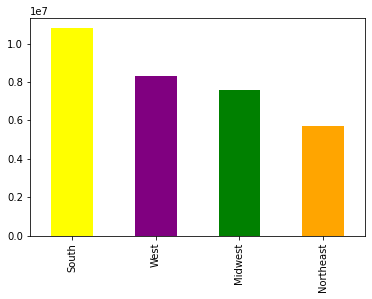

In [25]:
# Create bar chart for users by region populations
region_population_bar= ords_prods_all['Region'].value_counts().plot.bar(color = ['yellow', 'purple', 'green', 'orange'])

In [31]:
# Export bar chart
region_population_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Region_population_bar'))

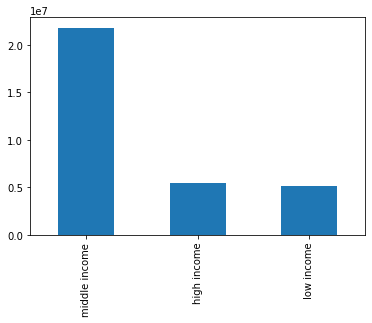

In [26]:
# Create bar chart to show distribution of income levels
income_users_bar = ords_prods_all['income_level'].value_counts().plot.bar()

In [32]:
# Export bar chart
income_users_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_users_bar'))

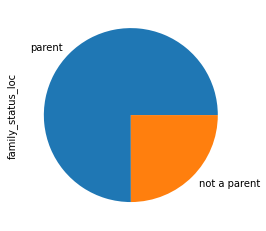

In [33]:
# Create pie chart to show users by family status 
family_status_pie = ords_prods_all['family_status_loc'].value_counts().plot.pie()

In [34]:
# Export pie chart
family_status_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Family_status_pie'))

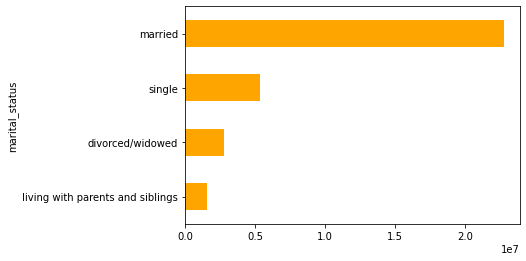

In [28]:
# Create bar chart to show users by marital status
marital_status_bar = ords_prods_all.groupby('marital_status').size().sort_values(ascending = True).plot.barh(color = ['orange'])

In [35]:
# Export bar chart
marital_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_status_bar'))

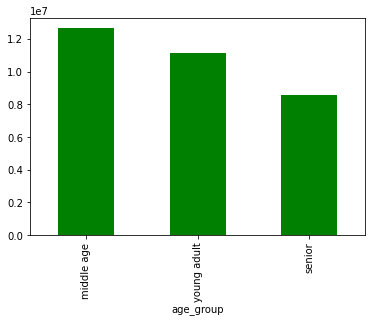

In [29]:
# Create bar chart to show users by age group
age_group_bar = ords_prods_all.groupby('age_group').size().sort_values(ascending = False).plot.bar(color = ['green'])

In [36]:
# Export bar chart
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_bar'))

# Export ords_prods_all

# Notebook kept crashing- had to separate

In [ ]:
# Export ords_prods_all

ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_all.pkl'))